# Eigenvalues, Eigenvectors, Principal Components, and Singular Values Computation

- **Course:** CS660/71425 Mathematical Foundations of Analytics
- **Instructor:** Prof. Sarbanes
- **Group-1:** Will Torres, Mike Griffin, Watson Blair, Syed Abdul Mubashir, Abdul Munaf Mohammed
- **Semester:** Fall 2024
- **Project #:** 2
- **Due Date:** 04-Nov-2024

## Project Description
The primary objectives of this project are to:
- Develop custom Python functions to compute Eigenvalues and Eigenvectors of a matrix.
- Implement a Principal Components Analysis (PCA) from scratch, following the standard steps involved in PCA computation.
- Create a function for Singular Value Decomposition (SVD), including the derivation of U, Σ, and V matrices.
- Compare the runtime performance of our custom implementations against Python’s built-in libraries, specifically NumPy and Scikit-learn.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from helpers.Process_Matrix.process_matrix import BenchmarkUtility

## Analysis

In [2]:
# Define sample sizes for analysis
matrix_sizes = [10, 25, 50, 75, 100, 250, 500, 750, 1000]
data_list = [np.random.rand(n, n) for n in matrix_sizes]
labels = [f'{n}x{n}' for n in matrix_sizes]

# Iterate through each data matrix in data_list
processor = BenchmarkUtility(labels=labels)
processor.batch_benchmark(data_list)

In [3]:
print("\nAll Execution Times:")
for key, times in processor.execution_times.items():
    print(f"{key}: {times}")


All Execution Times:
manual_eig: [0.00012493133544921875, 6.9141387939453125e-06, 1.0013580322265625e-05, 2.1457672119140625e-06, 4.0531158447265625e-06, 2.1457672119140625e-06, 1.0013580322265625e-05, 9.059906005859375e-06, 4.0531158447265625e-06]
sklearn_eig: [0.0012359619140625, 0.004223823547363281, 0.0005879402160644531, 0.04082489013671875, 0.22743606567382812, 5.32695198059082, 13.378218173980713, 16.268474102020264, 19.206398010253906]
manual_pca: [0.002370119094848633, 0.0041768550872802734, 0.07735800743103027, 0.23610377311706543, 0.4898979663848877, 5.664952039718628, 14.956511974334717, 49.95796513557434, 81.57194685935974]
sklearn_pca: [0.0015490055084228516, 0.041716814041137695, 0.23116612434387207, 0.02747797966003418, 0.16562914848327637, 1.3542630672454834, 0.20639300346374512, 0.24011993408203125, 0.027248144149780273]
manual_svd: [3.0994415283203125e-06, 2.86102294921875e-06, 4.0531158447265625e-06, 4.76837158203125e-06, 1.9073486328125e-06, 3.0994415283203125e-06

## Conclusion
- Summarize findings from the project

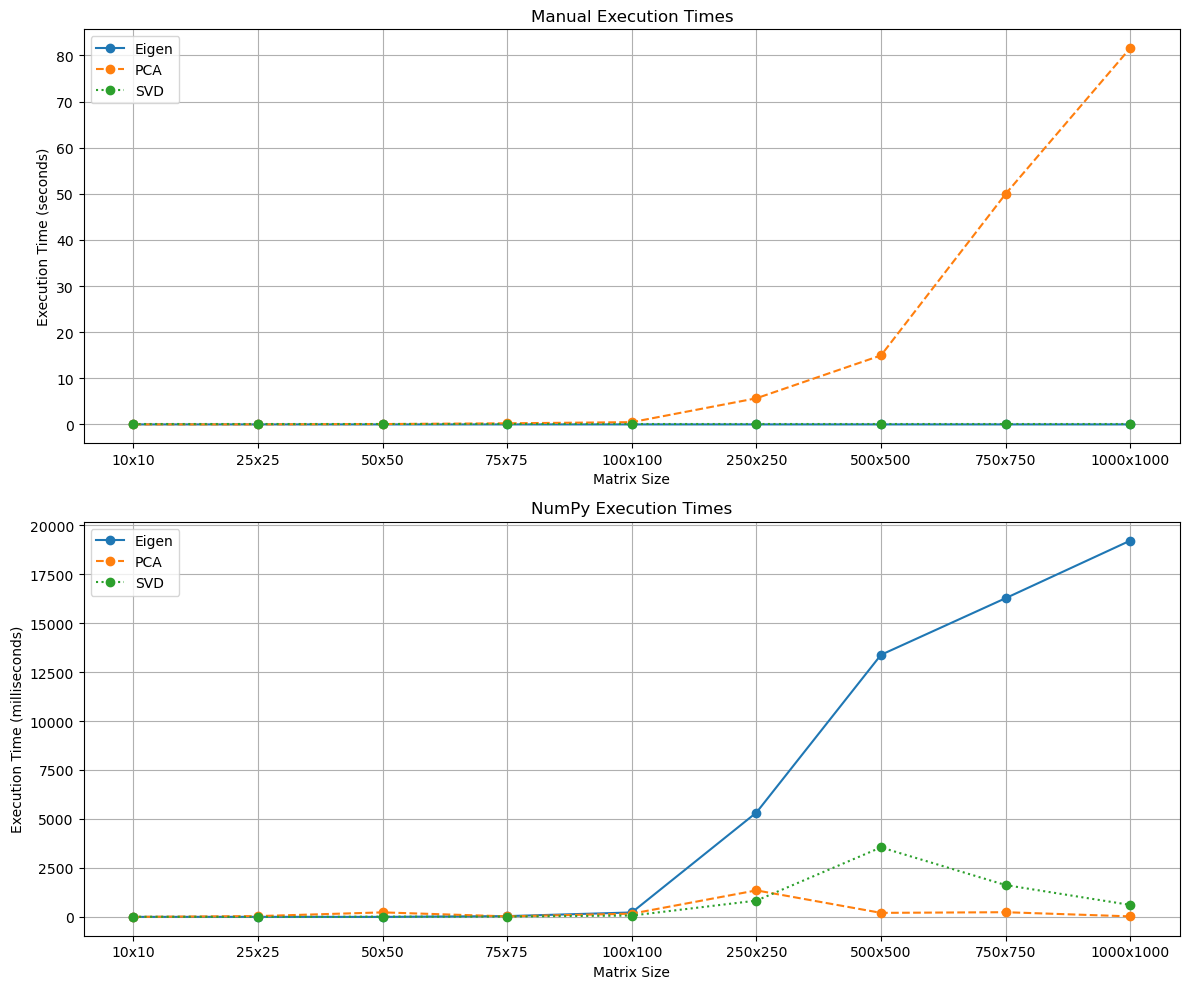

In [4]:
processor.plot_execution_times() 